Task 3: CNN for Image Classification
Creating sample MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Sample MNIST dataset with 5000 samples saved to 'mnist_sample.csv'

Building CNN for image classification...
Training set: 3500 samples
Validation set: 750 samples
Test set: 750 samples
Building CNN model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)


Training CNN model...
Epoch 1/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 331ms/step - accuracy: 0.2812 - loss: 2.0368 - val_accuracy: 0.8440 - val_loss: 0.6234
Epoch 2/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.7948 - loss: 0.6517 - val_accuracy: 0.9133 - val_loss: 0.2622
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 322ms/step - accuracy: 0.8744 - loss: 0.3731 - val_accuracy: 0.9413 - val_loss: 0.1844
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 263ms/step - accuracy: 0.9122 - loss: 0.2805 - val_accuracy: 0.9493 - val_loss: 0.1498
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 249ms/step - accuracy: 0.9396 - loss: 0.1948 - val_accuracy: 0.9533 - val_loss: 0.1519
Epoch 6/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 184ms/step - accuracy: 0.9403 - loss: 0.2023 - val_accuracy: 0.9600 - val_loss: 0.1353
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 195ms/step - accuracy: 0.9553 - loss: 0.1584 - val_accuracy: 0.9653 - val_loss: 0.1159
Epoch 8/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - accuracy: 0.9584 - los

Sample predictions visualization saved to 'cnn_predictions.png'
Model saved to 'mnist_cnn_model.h5'

Task completed successfully!


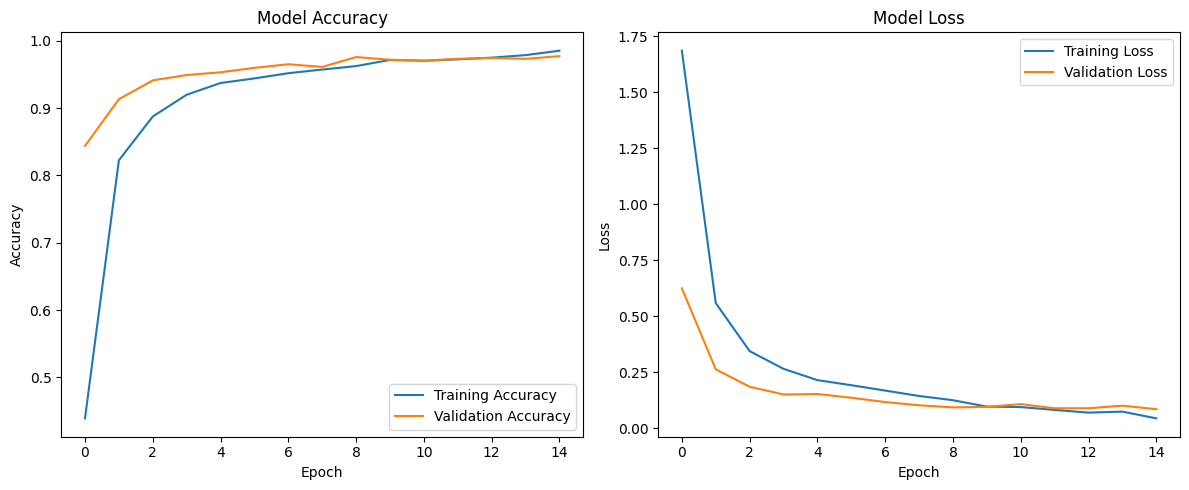

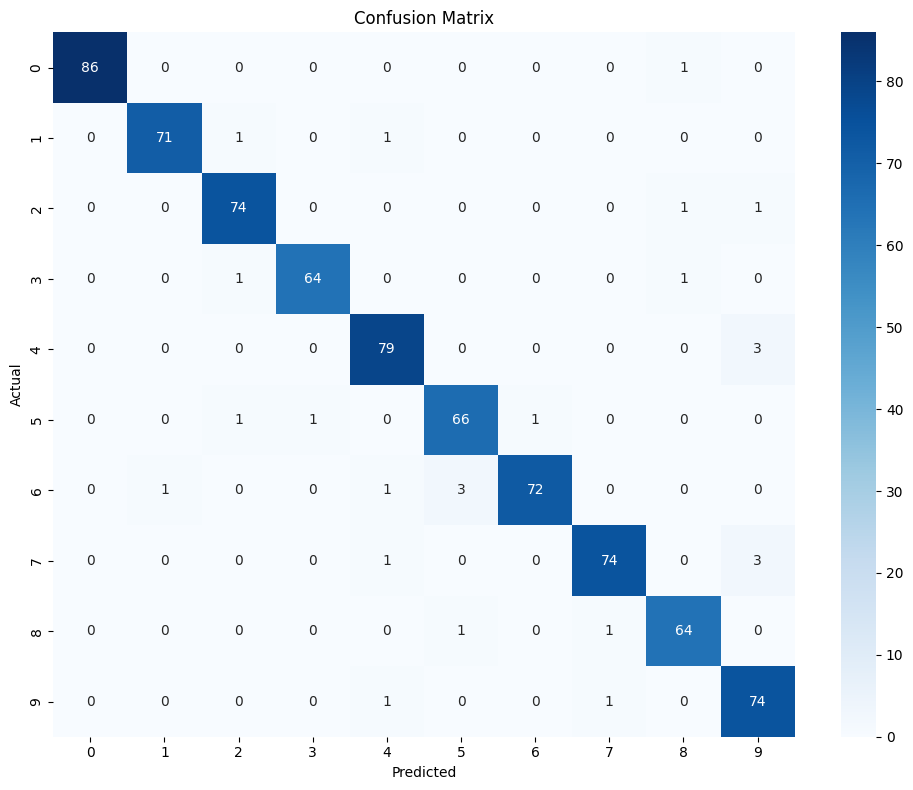

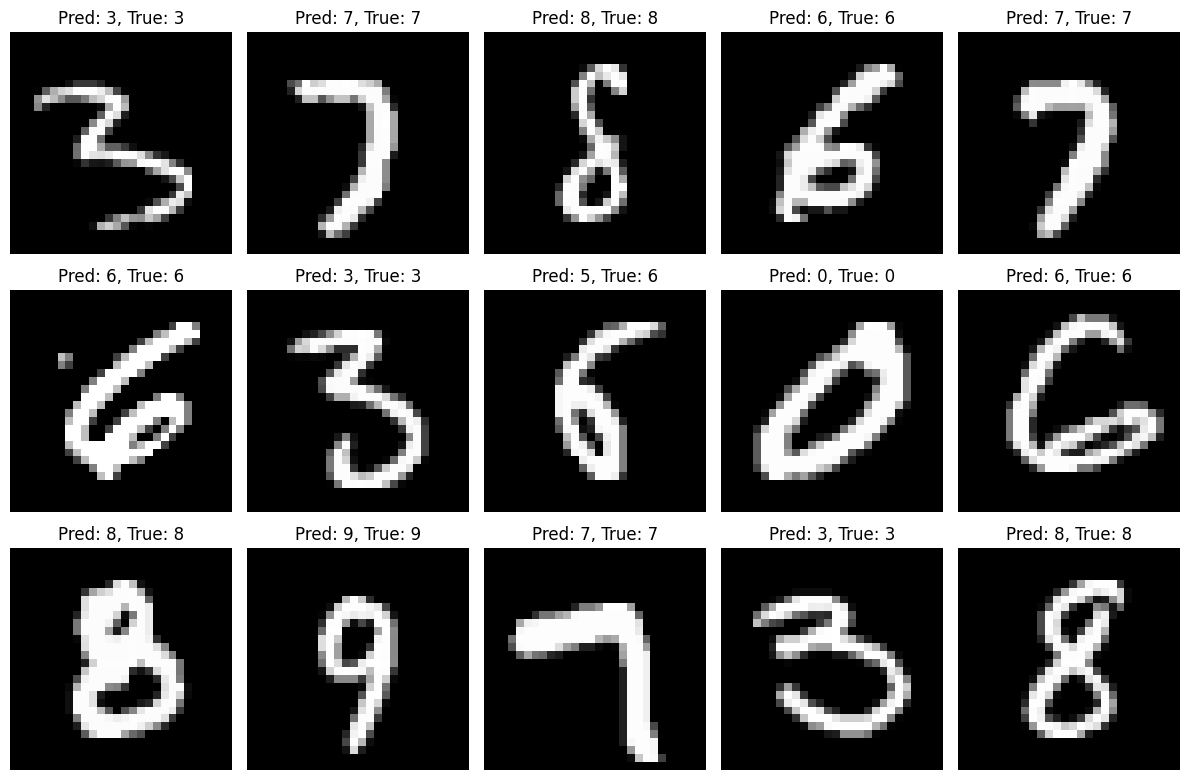

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os

# Create a function to generate and save a sample MNIST dataset
def create_mnist_sample_dataset(num_samples=5000):
    print("Creating sample MNIST dataset...")

    # Load the MNIST dataset from Keras
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

    # Combine train and test data
    x_combined = np.vstack((x_train, x_test))
    y_combined = np.hstack((y_train, y_test))

    # Randomly select samples
    indices = np.random.choice(len(x_combined), num_samples, replace=False)
    x_sample = x_combined[indices]
    y_sample = y_combined[indices]

    # Flatten the images for CSV storage
    x_sample_flat = x_sample.reshape(num_samples, -1)

    # Create a DataFrame
    columns = [f'pixel_{i}' for i in range(784)]
    mnist_df = pd.DataFrame(x_sample_flat, columns=columns)
    mnist_df['label'] = y_sample

    # Save to CSV
    mnist_df.to_csv('mnist_sample.csv', index=False)
    print(f"Sample MNIST dataset with {num_samples} samples saved to 'mnist_sample.csv'")

    return mnist_df

# Main function to build and train CNN
def cnn_image_classification():
    # Create dataset if it doesn't exist
    try:
        mnist_df = pd.read_csv('mnist_sample.csv')
        print("Loaded existing MNIST sample dataset")
    except FileNotFoundError:
        mnist_df = create_mnist_sample_dataset()

    print("\nBuilding CNN for image classification...")

    # Prepare features and target
    X = mnist_df.drop('label', axis=1).values
    y = mnist_df['label'].values

    # Reshape the data for CNN input (samples, height, width, channels)
    X = X.reshape(-1, 28, 28, 1).astype('float32') / 255.0

    # One-hot encode the labels
    y = to_categorical(y, 10)

    # Split data into training, validation, and testing sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Validation set: {X_val.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")

    # Build the CNN model
    print("Building CNN model...")
    model = Sequential([
        # First convolutional layer
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        # Second convolutional layer
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        # Third convolutional layer
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        # Flatten and dense layers
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Print model summary
    model.summary()

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    print("\nTraining CNN model...")
    history = model.fit(
        X_train, y_train,
        epochs=15,
        batch_size=128,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluate the model
    print("\nEvaluating model on test set...")
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"Test accuracy: {test_acc:.4f}")

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_true_classes, y_pred_classes))

    # Visualize training history
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig('cnn_training_history.png', dpi=300)
    print("Training history visualization saved to 'cnn_training_history.png'")

    # Visualize confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig('cnn_confusion_matrix.png', dpi=300)
    print("Confusion matrix saved to 'cnn_confusion_matrix.png'")

    # Visualize some predictions
    plt.figure(figsize=(12, 8))
    for i in range(15):
        plt.subplot(3, 5, i+1)
        plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
        pred_class = y_pred_classes[i]
        true_class = y_true_classes[i]
        plt.title(f"Pred: {pred_class}, True: {true_class}")
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('cnn_predictions.png', dpi=300)
    print("Sample predictions visualization saved to 'cnn_predictions.png'")

    # Save the model
    model.save('mnist_cnn_model.h5')
    print("Model saved to 'mnist_cnn_model.h5'")

    return model

if __name__ == "__main__":
    print("Task 3: CNN for Image Classification")
    print("===================================")
    model = cnn_image_classification()
    print("\nTask completed successfully!")